<a href="https://colab.research.google.com/github/Eazaz001/Eazaz001/blob/main/Cyber_attack2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install scikit-learn
!pip install nltk
!pip install matplotlib
!pip install seaborn
!pip install wordcloud


In [2]:
from google.colab import files
import pandas as pd

# Upload the file manually
uploaded = files.upload()

# After uploading, load the dataset
df = pd.read_csv(list(uploaded.keys())[0])

# Display the first few rows of the dataset
df.head()


Saving cybersecurity_attacks.csv to cybersecurity_attacks.csv


,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Payload Data,...,Action Taken,Severity Level,User Information,Device Information,Network Segment,Geo-location Data,Proxy Information,Firewall Logs,IDS/IPS Alerts,Log Source
0,2023-05-30 06:33:58,103.216.15.12,84.9.164.252,31225,17616,ICMP,503,Data,HTTP,Qui natus odio asperiores nam. Optio nobis ius...,...,Logged,Low,Reyansh Dugal,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment A,"Jamshedpur, Sikkim",150.9.97.135,Log Data,NaN,Server
1,2020-08-26 07:08:30,78.199.217.198,66.191.137.154,17245,48166,ICMP,1174,Data,HTTP,Aperiam quos modi officiis veritatis rem. Omni...,...,Blocked,Low,Sumer Rana,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment B,"Bilaspur, Nagaland",NaN,Log Data,NaN,Firewall
2,2022-11-13 08:23:25,63.79.210.48,198.219.82.17,16811,53600,UDP,306,Control,HTTP,Perferendis sapiente vitae soluta. Hic delectu...,...,Ignored,Low,Himmat Karpe,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Segment C,"Bokaro, Rajasthan",114.133.48.179,Log Data,Alert Data,Firewall
3,2023-07-02 10:38:46,163.42.196.10,101.228.192.255,20018,32534,UDP,385,Data,HTTP,Totam maxime beatae expedita explicabo porro l...,...,Blocked,Medium,Fateh Kibe,Mozilla/5.0 (Macintosh; PPC Mac OS X 10_11_5; ...,Segment B,"Jaunpur, Rajasthan",NaN,NaN,Alert Data,Firewall
4,2023-07-16 13:11:07,71.166.185.76,189.243.174.238,6131,26646,TCP,1462,Data,DNS,Odit nesciunt dolorem nisi iste iusto. Animi v...,...,Blocked,Low,Dhanush Chad,Mozilla/5.0 (compatible; MSIE 5.0; Windows NT ...,Segment C,"Anantapur, Tripura",149.6.110.119,NaN,Alert Data,Firewall


In [3]:
import nltk
import string

# Preprocess the text data (Payload Data column)
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation and non-alphabetic characters
    text = ''.join([c if c.isalnum() or c.isspace() else ' ' for c in text])
    return text

# Apply preprocessing function to 'Payload Data'
df['cleaned_payload'] = df['Payload Data'].apply(preprocess_text)

# Check for null values in the cleaned data
print(df['cleaned_payload'].isnull().sum())

# Display the first few rows of the cleaned data
df[['Payload Data', 'cleaned_payload']].head()


0


,Payload Data,cleaned_payload
0,Qui natus odio asperiores nam. Optio nobis ius...,qui natus odio asperiores nam optio nobis ius...
1,Aperiam quos modi officiis veritatis rem. Omni...,aperiam quos modi officiis veritatis rem omni...
2,Perferendis sapiente vitae soluta. Hic delectu...,perferendis sapiente vitae soluta hic delectu...
3,Totam maxime beatae expedita explicabo porro l...,totam maxime beatae expedita explicabo porro l...
4,Odit nesciunt dolorem nisi iste iusto. Animi v...,odit nesciunt dolorem nisi iste iusto animi v...


In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Create TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features=5000)

# Fit and transform the text data
X = vectorizer.fit_transform(df['cleaned_payload']).toarray()

# Target variable (Action Taken column as labels)
# You can adjust encoding based on your dataset's 'Action Taken' column values
y = df['Action Taken'].map({'Logged': 0, 'Blocked': 1, 'Ignored': 2})  # Example encoding

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the training and test data
print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")


Training data shape: (32000, 181)
Test data shape: (8000, 181)


Accuracy Score: 0.331
Classification Report:
              precision    recall  f1-score   support

           0       0.32      0.28      0.30      2645
           1       0.35      0.38      0.36      2733
           2       0.32      0.33      0.33      2622

    accuracy                           0.33      8000
   macro avg       0.33      0.33      0.33      8000
weighted avg       0.33      0.33      0.33      8000



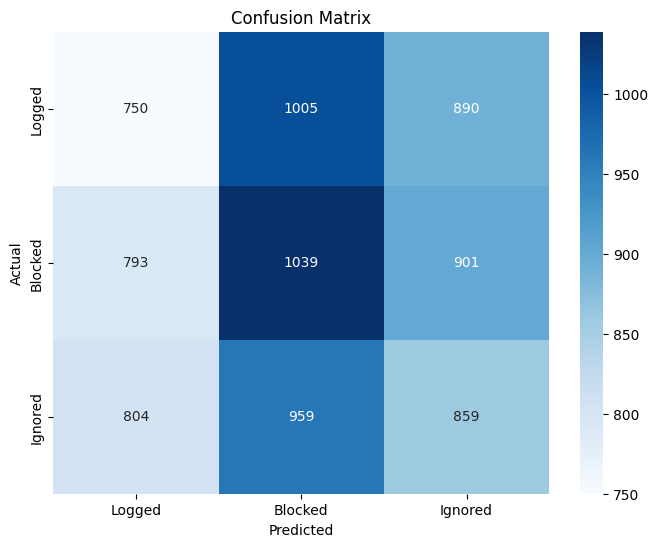

F1 Score: 0.32991281442146214


In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize the model
model = LogisticRegression(max_iter=1000)

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Logged', 'Blocked', 'Ignored'], yticklabels=['Logged', 'Blocked', 'Ignored'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# F1 Score
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1 Score: {f1}")


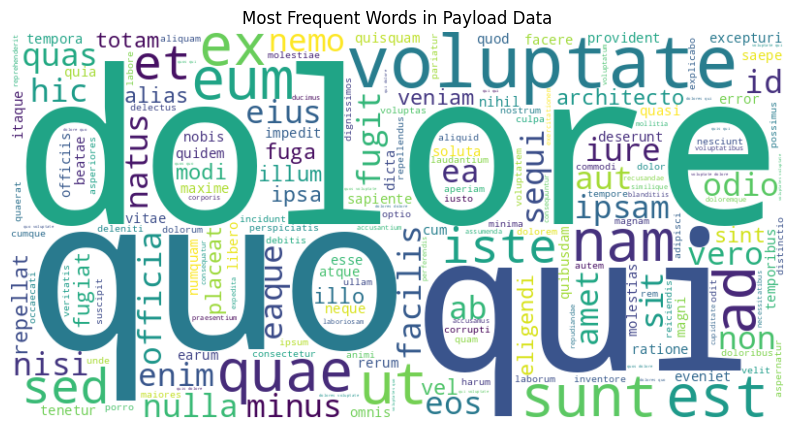

In [6]:
from wordcloud import WordCloud

# Generate a word cloud from the entire dataset
text_data = ' '.join(df['cleaned_payload'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

# Display the word cloud
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Most Frequent Words in Payload Data")
plt.show()


In [7]:
import joblib

# Save the trained model and vectorizer
joblib.dump(model, 'cyber_attack_model.pkl')
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')

# To load the model later:
# model = joblib.load('cyber_attack_model.pkl')
# vectorizer = joblib.load('tfidf_vectorizer.pkl')


['tfidf_vectorizer.pkl']

In [8]:
# Example: Predict on new data
new_data = ["Suspicious activity detected from IP 192.168.1.100"]
new_data_transformed = vectorizer.transform(new_data)
prediction = model.predict(new_data_transformed)

# Output the prediction
print(f"Prediction for new data: {prediction}")


Prediction for new data: [2]
